In [1]:
cd /home

/home


In [10]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os

from tensorflow.keras.optimizers import Adam
from src.record import load_records
from src.losses import reduce_std
from src.model import create_model

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
dataset = 'f_dhtau_low'
test_ds = load_records('./data/records/{}/fold_0/test'.format(dataset))

In [23]:
window_size = 50
model = create_model(window_size=window_size)
model.load_weights('./logs/test_{}/weigths'.format(dataset))

In [24]:
optimizer = Adam(1e-3)
model.compile(loss_fn=reduce_std)

In [25]:
# model.summary()

In [26]:
model.evaluate(test_ds)

1/1 [==============================] - 1s 677ms/step - loss: 0.6211


0.6210631728172302

In [27]:
flux_pred = model.predict(test_ds)

1/1 [==============================] - 0s 368ms/step


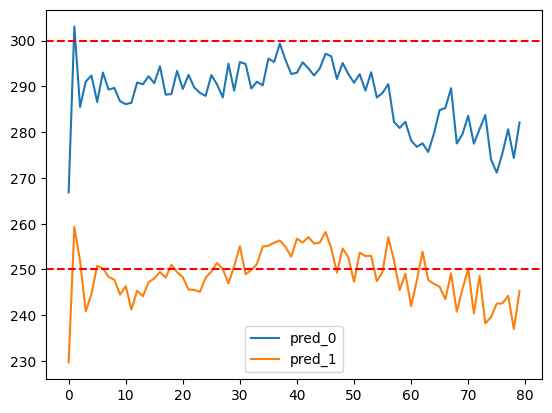

In [28]:
true_df = pd.read_csv('./data/records/{}/fold_0/test/true_values.csv'.format(dataset))

for f, (i, row) in zip(flux_pred, true_df.iterrows()):
    plt.plot(f, label='pred_{}'.format(i))
    plt.axhline(y=row['true_flux'], color='r', linestyle='--')
    
plt.legend()

In [29]:
tf.reduce_mean(flux_pred, axis=1)

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[287.94598],
       [248.82019]], dtype=float32)>